<a href="https://colab.research.google.com/github/martaherraiz/UFV-visualizaciondatos/blob/main/Pr%C3%A1ctica1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 1 - Marta Herraiz Méndez
4º A Visualización de datos

In [36]:
!pip install plotly_express

Se carga la base de datos

In [37]:
import pandas as pd
import plotly.express as px

df = pd.read_csv('datos_ejercicio_ventas.csv')

df.head()

,COUNTRY,SUBBRAND,YEAR,MONTH,SCENARIO,FORECAST,FORECAST_YEAR,AMOUNT
0,Portugal,Lipton (L3),2023,12,AI_forecast,AI_P02F,2023.0,754356.237194
1,Great Britain,Lipton (L3),2023,12,AI_forecast,AI_P10F,2023.0,560030.558029
2,Spain,Pepsi Max (L3),2023,12,AI_forecast,AI_P09F,2023.0,88501.980847
3,Great Britain,7up (L3),2024,12,AI_forecast,AI_P10F,2023.0,363224.511516
4,Hungary,Lipton (L3),2023,9,AI_forecast,AI_P03F,2023.0,396176.120491


Variables:

COUNTRY: Indica el país al que pertenecen los datos

SUBRAND: es una sub-marca dentro de un grupo (los grupos son L3 por ejemplo)

YEAR: Año al que corresponden los datos.

MONTH: Mes del año.

SCENARIO: Escenario de ventas, puede haber sido generado por IA como en AI_FORECAST o ser real.

FORECAST: Código asociado al tipo de previsión, como “AI_P02F”, “AI_P10F”, etc.

FORECAST_YEAR: Año para el cual se realiza la predicción de ventas.

AMOUNT: La cantidad de ventas.

# **Ejercicio 1 - Distribución de ventas**

## Limpieza

Primero se verá cuantas filas hay de ventas generadas por IA y reales.

In [38]:
print(df['SCENARIO'].value_counts())

SCENARIO
AI_forecast    17766
actual           900
Name: count, dtype: int64


Se usarán los valores reales, que son 900 y se eliminarán los generados por la IA

In [39]:
df_ventas = df[df['SCENARIO'] == 'actual']

df_ventas.head()

,COUNTRY,SUBBRAND,YEAR,MONTH,SCENARIO,FORECAST,FORECAST_YEAR,AMOUNT
277,Portugal,Pepsi Max (L3),2023,10,actual,NaN,NaN,1.885949e+05
278,Portugal,7up (L3),2023,3,actual,NaN,NaN,2.934971e+05
279,Portugal,7up (L3),2023,10,actual,NaN,NaN,3.484466e+05
280,Great Britain,7up Free (L3),2023,10,actual,NaN,NaN,1.172553e+06
281,Norway,Pepsi Regular (L3),2023,10,actual,NaN,NaN,3.784859e+04


Como se han eliminado los valores donde la variable SCENARIO era igual a AI_FORECAST las dos columnas siguientes con los datos de ese forecast están con valores 'null', se pueden eliminar.

In [40]:
df_ventas = df_ventas.drop(['SCENARIO' ,'FORECAST', 'FORECAST_YEAR'], axis=1)

df_ventas.head()

,COUNTRY,SUBBRAND,YEAR,MONTH,AMOUNT
277,Portugal,Pepsi Max (L3),2023,10,1.885949e+05
278,Portugal,7up (L3),2023,3,2.934971e+05
279,Portugal,7up (L3),2023,10,3.484466e+05
280,Great Britain,7up Free (L3),2023,10,1.172553e+06
281,Norway,Pepsi Regular (L3),2023,10,3.784859e+04


Ahora se verá el número de valores que puede tomar cada variable de las restantes.

In [41]:
print(df_ventas['COUNTRY'].unique())
print("Numero de paises únicos:", len(df_ventas['COUNTRY'].unique()))
print('\n',df_ventas['SUBBRAND'].unique())
print("Numero de productos únicos:", len(df_ventas['SUBBRAND'].unique()))
print('\n',df_ventas['YEAR'].unique())
print("Numero de años únicos:", len(df_ventas['YEAR'].unique()))
print('\n',df_ventas['MONTH'].unique())
print("Numero de meses únicos:", len(df_ventas['MONTH'].unique()))

['Portugal' 'Great Britain' 'Norway' 'Netherlands' 'Hungary' 'Spain'
 'Denmark' 'Czech' 'Italy']
Numero de paises únicos: 9

 ['Pepsi Max (L3)' '7up (L3)' '7up Free (L3)' 'Pepsi Regular (L3)'
 'Lipton (L3)' 'Mountain Dew (L3)']
Numero de productos únicos: 6

 [2023 2024]
Numero de años únicos: 2

 [10  3  1  2  4  7  5 11 12  6  8  9]
Numero de meses únicos: 12


Se puede ver que son 9 países distintos. En el caso de los productos hay 6, pero todos ellos son de la clase L3. Por último, las fechas parecen correctas, ya que son dos años que han pasado y 12 meses.


Ahora se estudiará la variable amount. Para comenzar, se verá su distribución para comprobar si hay outliers o valores faltantes.

In [42]:
nans = df_ventas['AMOUNT'].isnull().sum()
print(nans)

0


Dado que no hay valores faltantes, se comprobarán los outliers. Se usará el método IQR, que consiste en crear rangos de valores que están por debajo de Q1 - 1.5 * IQR o por encima de Q3 + 1.5 * IQR. El IQR se define haciendo la resta de Q1 - Q3.

In [43]:
# Se crean los cuartiles
Q1 = df_ventas['AMOUNT'].quantile(0.25)
Q3 = df_ventas['AMOUNT'].quantile(0.75)
IQR = Q3 - Q1

# Límites inferior y superior para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_ventas[(df_ventas['AMOUNT'] < lower_bound) | (df_ventas['AMOUNT'] > upper_bound)]
print(f"Número de outliers en AMOUNT: {outliers.shape[0]}")
print(f"Límite inferior: {lower_bound}, Límite superior: {upper_bound}")

Número de outliers en AMOUNT: 112
Límite inferior: -825454.377456359, Límite superior: 1524405.8098373231


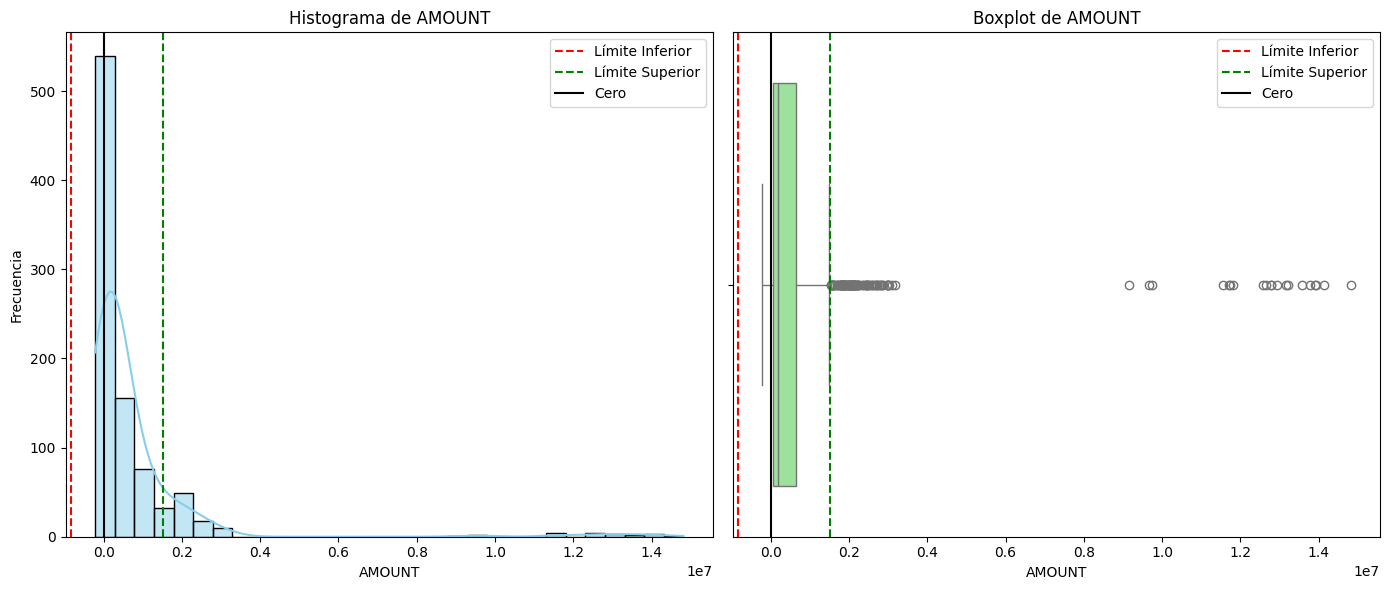

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(df_ventas['AMOUNT'], bins=30, kde=True, color='skyblue')
plt.axvline(lower_bound, color='red', linestyle='--', label='Límite Inferior')
plt.axvline(upper_bound, color='green', linestyle='--', label='Límite Superior')
plt.axvline(0, color='black', linestyle='-', label='Cero')
plt.xlabel('AMOUNT')
plt.ylabel('Frecuencia')
plt.title('Histograma de AMOUNT')
plt.legend()

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df_ventas['AMOUNT'], color='lightgreen')
plt.axvline(lower_bound, color='red', linestyle='--', label='Límite Inferior')
plt.axvline(upper_bound, color='green', linestyle='--', label='Límite Superior')
plt.axvline(0, color='black', linestyle='-', label='Cero')
plt.xlabel('AMOUNT')
plt.title('Boxplot de AMOUNT')
plt.legend()

plt.tight_layout()
plt.show()

Dado que el límite inferior es negativo se estudiará. Esto puede ser por que haya devoluciones, pero es una variable que mide la cantidad de ventas no un balance general de la empresa, por lo que es raro que se haya devuelto más de lo vendido durante el mes. Además, se puede ver que los outliers no pertenecen al límite inferior, todos están en el superior. Se contará el número de valores negativos para valorar si se eliminan.

In [45]:
valores_negativos = df_ventas[df_ventas['AMOUNT'] < 0]

valores_negativos_outliers = valores_negativos[valores_negativos['AMOUNT'] < lower_bound]
num_valores_negativos_outliers = valores_negativos_outliers.shape[0]
print(f"Número de valores negativos en 'AMOUNT': {valores_negativos.shape[0]}")
print(f"Número de valores negativos que son outliers: {num_valores_negativos_outliers}")


Número de valores negativos en 'AMOUNT': 10
Número de valores negativos que son outliers: 0


Únicamente hay 10 valores negativos. Como es un caso raro, por lo que se ha comentado antes, se eliminarán estos valores y se pasará a estudiar el límite superior y sus outliers.

In [46]:
indices_negativos = valores_negativos.index
df_ventas = df_ventas.drop(indices_negativos)

# Comprobar si quedan valores negativos en 'AMOUNT'
quedan_negativos = (df_ventas['AMOUNT'] < 0).any()
print(f"¿Quedan valores negativos en 'AMOUNT'? {quedan_negativos}")

¿Quedan valores negativos en 'AMOUNT'? False


Estudio del límite superior:

In [47]:
# Calcular métricas antes de eliminar outliers
media_con_outliers = df_ventas['AMOUNT'].mean()
media_sin_outliers = df_ventas[df_ventas['AMOUNT'] <= upper_bound]['AMOUNT'].mean()

print(f"Media con outliers: {media_con_outliers}")
print(f"Media sin outliers: {media_sin_outliers}")

Media con outliers: 753006.9232190747
Media sin outliers: 285463.30686853535


Se puede ver que los outliers tienen mucha relevancia, cambia significativamente la media con y sin ellos. Para continuar, se puede ver si los outliers son en meses de verano o navidad, ya que se intuye que en estos meses la venta es mayor.

In [48]:
outliers = df_ventas[df_ventas['AMOUNT'] > upper_bound]

# Agrupar por mes y contar los outliers
outliers_por_mes = outliers.groupby(['YEAR', 'MONTH']).size().reset_index(name='count')

# Imprimir resultados
print("Outliers por mes:")
print(outliers_por_mes)

Outliers por mes:
    YEAR  MONTH  count
0   2023      1      6
1   2023      2      5
2   2023      3      6
3   2023      4      5
4   2023      5      6
5   2023      6      6
6   2023      7      6
7   2023      8      6
8   2023      9      6
9   2023     10      4
10  2023     11      5
11  2023     12      6
12  2024      1      4
13  2024      2      5
14  2024      3      5
15  2024      4      6
16  2024      5      6
17  2024      6      6
18  2024      7      6
19  2024      8      7


Se podría estudiar los meses con más outliers. Pero dado que en todos los meses hay y en casi todos entre 5-6, no parece que haya una tendencia. Es decir, pensar que en fechas de vacaciones habrá más, es algo erróneo, ya que esto no pasa.

Por lo que, al haber en todos los meses outliers y la misma cantidad (aproximadamente) podría ser razonable borrarlos. Pero, por otro lado, se ve que afectan bastante a la distribución de las ventas, ya que varía mucho la media con ellos y sin ellos. Se mantendrán para no perder información, ya que al haber eliminado los negativos los demás pueden ser ciertos, meses con más ventas.  

**Distribución de las ventas en cada país:**

Primero se verá cuántas ventas hay por país y luego se visualizará la tendencia marcando el país con menos ventas y el que más.

In [49]:
import plotly.express as px

# Agrupar las ventas por país
ventas_por_pais = df_ventas.groupby('COUNTRY')['AMOUNT'].sum().reset_index()

# Crear gráfica de barras
fig_barras_pais = px.bar(ventas_por_pais,
                          x='COUNTRY',
                          y='AMOUNT',
                          labels={'COUNTRY': 'País', 'AMOUNT': 'Ventas Totales'},
                          title='Ventas Totales por País',
                          color='AMOUNT',  # Colorear las barras según las ventas
                          color_continuous_scale=px.colors.sequential.Viridis)

# Personalizar la gráfica
fig_barras_pais.update_layout(bargap=0.2, xaxis_title='País', yaxis_title='Ventas Totales')

# Mostrar gráfica
fig_barras_pais.show()

In [50]:
# Ventas totales por país
ventas_por_pais = df_ventas.groupby('COUNTRY')['AMOUNT'].sum().reset_index()

# Crear gráfica de dispersión
fig = px.scatter(ventas_por_pais,
                 x='COUNTRY',
                 y='AMOUNT',
                 color='COUNTRY',  # Para colorear por país
                 hover_name='COUNTRY',
                 labels={'COUNTRY':'País', 'AMOUNT':'Ventas Totales'},
                 title='Distribución de Ventas por País',
                 size='AMOUNT',  # Si deseas que el tamaño de los puntos represente las ventas
                 size_max=70)

# Mostrar gráfica
fig.show()

Esta es la distribución de las ventas por países, se puede ver que el país con más ventas es Gran Bretaña y el país con menos es España. Además, se puede ver que hay una gran diferencia de ventas entre el país con más ventas (Dinamarca) y los países con menos (Chequia, Gran Bretaña, Hungría, Países Bajos, Italia, Noruega, España y Portugal). Se dividen en dos grupos muy diferenciados.

**Distribución de las ventas cada mes y año:**


In [51]:
# Agrupar las ventas por año y mes
ventas_por_mes_año = df_ventas.groupby(['YEAR', 'MONTH'])['AMOUNT'].sum().reset_index()

# Crear una columna de fecha para facilitar el gráfico
ventas_por_mes_año['DATE'] = pd.to_datetime(ventas_por_mes_año[['YEAR', 'MONTH']].assign(DAY=1))

# Crear gráfica de barras
fig = px.bar(ventas_por_mes_año,
             x='DATE',
             y='AMOUNT',
             color='YEAR',  # Colorear las barras por año
             labels={'DATE': 'Fecha', 'AMOUNT': 'Ventas Totales'},
             title='Ventas Totales por Mes y Año')

# Mostrar gráfica
fig.show()

In [52]:
# Agrupar las ventas por año y mes
ventas_por_mes_año = df_ventas.groupby(['YEAR', 'MONTH'])['AMOUNT'].sum().reset_index()

# Crear un campo de fecha para el eje x
ventas_por_mes_año['DATE'] = pd.to_datetime(ventas_por_mes_año[['YEAR', 'MONTH']].assign(DAY=1))

# Crear gráfica de burbujas
fig = px.scatter(ventas_por_mes_año,
                 x='DATE',
                 y='AMOUNT',
                 size='AMOUNT',
                 hover_name='MONTH',
                 labels={'DATE': 'Fecha', 'YEAR': 'Año', 'AMOUNT': 'Ventas Totales'},
                 title='Gráfico de Burbujas de Ventas por Mes y Año',
                 size_max=70)

# Mostrar gráfica
fig.show()

 Se ve que hay menos ventas a principios del año 2023 y más en octubre del 2023 y agosto del 2024. Por lo demás, se distribuyen de manera similar en los distintos meses. Aunque, se puede ver como van creciendo las ventas de principios de año hasta mediados (junio-octubre) en ambos años.

**Distribución de las ventas en cada marca:**


In [53]:
# Agrupar las ventas por marca
ventas_por_marca = df_ventas.groupby('SUBBRAND')['AMOUNT'].sum().reset_index()

# Crear gráfica de barras
fig_barras = px.bar(ventas_por_marca,
                     x='SUBBRAND',
                     y='AMOUNT',
                     labels={'SUBBRAND': 'Marca', 'AMOUNT': 'Ventas Totales'},
                     title='Ventas Totales por Marca',
                     color='AMOUNT',  # Colorear las barras según las ventas
                     color_continuous_scale=px.colors.sequential.Viridis)

# Personalizar la gráfica
fig_barras.update_layout(bargap=0.2, xaxis_title='Marca', yaxis_title='Ventas Totales')

# Mostrar gráfica
fig_barras.show()

In [54]:
# Crear gráfica de burbujas
fig_burbujas = px.scatter(ventas_por_marca,
                          x='SUBBRAND',
                          y='AMOUNT',
                          size='AMOUNT',
                          hover_name='SUBBRAND',
                          labels={'SUBBRAND': 'Marca', 'AMOUNT': 'Ventas Totales'},
                          title='Gráfico de Burbujas de Ventas por Marca',
                          size_max=70)

# Mostrar gráfica
fig_burbujas.show()

Se observa una gran diferencia entre las marcas más vendidas y las menos vendidas. Pepsi es la que más vende seguida de Lipton. La menos vendida es Mountain Dew. También es interesante ver la diferencia entre el 7up sin azucar y el 7up normal.

# Ejercicio 2 - tendencia y estacionalidad:



**Todas las ventas del país con menos ventas**

Como ya se sabe, el país con menos ventas es España. Por lo que se agruparán las ventas por mes y año de este país y se graficará.

In [55]:
# Agrupar ventas por país
ventas_por_pais = df_ventas.groupby('COUNTRY')['AMOUNT'].sum().reset_index()

# Encontrar el país con menos ventas
pais_menos_ventas = ventas_por_pais.loc[ventas_por_pais['AMOUNT'].idxmin()]
print(f"País con menos ventas: {pais_menos_ventas['COUNTRY']} con {pais_menos_ventas['AMOUNT']} ventas.")

País con menos ventas: Spain con 8131265.977520084 ventas.


In [56]:
ventas_pais_menos_ventas = df_ventas[df_ventas['COUNTRY'] == pais_menos_ventas['COUNTRY']]

# Agrupar las ventas por año y mes
ventas_por_mes_año = ventas_pais_menos_ventas.groupby(['YEAR', 'MONTH'])['AMOUNT'].sum().reset_index()

# Crear un campo de fecha para el eje x
ventas_por_mes_año['DATE'] = pd.to_datetime(ventas_por_mes_año[['YEAR', 'MONTH']].assign(DAY=1))

In [57]:
# Crear gráfica de líneas
fig_tendencia = px.line(ventas_por_mes_año,
                         x='DATE',
                         y='AMOUNT',
                         title=f'Tendencia de Ventas en {pais_menos_ventas["COUNTRY"]}',
                         labels={'DATE': 'Fecha', 'AMOUNT': 'Ventas Totales'})

# Mostrar gráfica
fig_tendencia.show()

La tendencia es ascendente desde los meses de enero hasta agosto en ambos años. Mientras que, es descendente en el resto de meses del año.

En cuanto a la estacionalidad, se puede ver que hay un patrón en los meses de verano (julio y agosto) donde hay picos de ventas altos.

**La marca con más ventas**

In [58]:
ventas_por_marca = df_ventas.groupby('SUBBRAND')['AMOUNT'].sum().reset_index()

# Encontrar la marca con más ventas
marca_mas_ventas = ventas_por_marca.loc[ventas_por_marca['AMOUNT'].idxmax()]
print(f"Marca con más ventas: {marca_mas_ventas['SUBBRAND']} con {marca_mas_ventas['AMOUNT']} ventas.")

Marca con más ventas: Pepsi Max (L3) con 396698670.6338175 ventas.


In [59]:
ventas_marca_mas_ventas = df_ventas[df_ventas['SUBBRAND'] == marca_mas_ventas['SUBBRAND']]

# Agrupar las ventas por año y mes
ventas_por_mes_año_marca = ventas_marca_mas_ventas.groupby(['YEAR', 'MONTH'])['AMOUNT'].sum().reset_index()

# Crear un campo de fecha para el eje x
ventas_por_mes_año_marca['DATE'] = pd.to_datetime(ventas_por_mes_año_marca[['YEAR', 'MONTH']].assign(DAY=1))

In [60]:
# Crear gráfica de líneas
fig_tendencia_marca = px.line(ventas_por_mes_año_marca,
                               x='DATE',
                               y='AMOUNT',
                               title=f'Tendencia de Ventas en {marca_mas_ventas["SUBBRAND"]}',
                               labels={'DATE': 'Fecha', 'AMOUNT': 'Ventas Totales'})

# Mostrar gráfica
fig_tendencia_marca.show()

La tendencia en este caso no es tan clara, ya que sube y baja todo el rato. Tiene sentido, dado que al ser la marca más vendida está continuamente subiendo y bajando pero no de forma brusca. Si que hay una bajada interesante en enero de 2024, pero lo demás es bastante estable.

En cuanto a la estacionalidad, no tiene una clara, no hay picos como que definan un patrón, los picos son cada dos o tres meses, pero no es algo fijo que cada mes suba o baje.

**Ejercicio 3 - Cuáles son las predicciones hechas en España y cómo de
buenas son**


Primero, se crea una nueva base de datos con los valores generados por la IA (las predicciones), luego se selecciona de ambos datasets las ventas en España, que son las que interesan en este momento.

In [61]:
df_ventas_pred = df[df['SCENARIO'] == 'AI_forecast']

df_ventas_pred.head()

,COUNTRY,SUBBRAND,YEAR,MONTH,SCENARIO,FORECAST,FORECAST_YEAR,AMOUNT
0,Portugal,Lipton (L3),2023,12,AI_forecast,AI_P02F,2023.0,754356.237194
1,Great Britain,Lipton (L3),2023,12,AI_forecast,AI_P10F,2023.0,560030.558029
2,Spain,Pepsi Max (L3),2023,12,AI_forecast,AI_P09F,2023.0,88501.980847
3,Great Britain,7up (L3),2024,12,AI_forecast,AI_P10F,2023.0,363224.511516
4,Hungary,Lipton (L3),2023,9,AI_forecast,AI_P03F,2023.0,396176.120491


In [62]:
# Filtrar las predicciones para España
df_ventas_pred = df_ventas_pred[df_ventas_pred['COUNTRY'] == 'Spain']

# Mostrar las primeras filas del DataFrame
df_ventas_pred.head()

,COUNTRY,SUBBRAND,YEAR,MONTH,SCENARIO,FORECAST,FORECAST_YEAR,AMOUNT
2,Spain,Pepsi Max (L3),2023,12,AI_forecast,AI_P09F,2023.0,88501.980847
20,Spain,Pepsi Regular (L3),2023,12,AI_forecast,AI_P05F,2023.0,134268.151080
25,Spain,Lipton (L3),2025,3,AI_forecast,AI_P11F,2023.0,9702.217953
62,Spain,7up Free (L3),2024,1,AI_forecast,AI_P04F,2023.0,70144.329753
68,Spain,7up (L3),2024,4,AI_forecast,AI_P02F,2023.0,38882.921227


In [63]:
# Filtrar las ventas reales para España
df_ventas = df_ventas[df_ventas['COUNTRY'] == 'Spain']

# Mostrar las primeras filas del DataFrame
df_ventas.head()

,COUNTRY,SUBBRAND,YEAR,MONTH,AMOUNT
296,Spain,7up Free (L3),2023,10,83196.895876
414,Spain,7up Free (L3),2024,1,60318.994231
728,Spain,7up Free (L3),2024,2,59482.850585
729,Spain,Lipton (L3),2024,2,8003.513133
835,Spain,7up (L3),2024,4,74882.992962


Ahora se graficarán las ventas de ambas para poder compararlas visualmente. Pero, hay que tener en cuenta que los forecast predicen en varios momentos, por lo que hay que separarlos para ver gráficamente la comparación. Es decir, se separará primero en tipos de forecast y luego se graficarán todos en una gráfica junto a los valores reales.

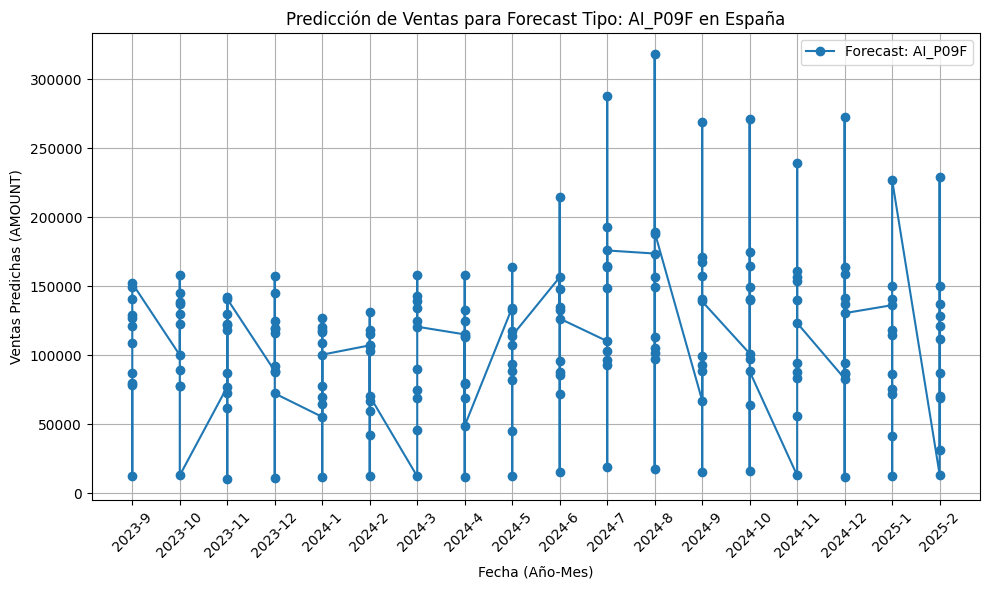

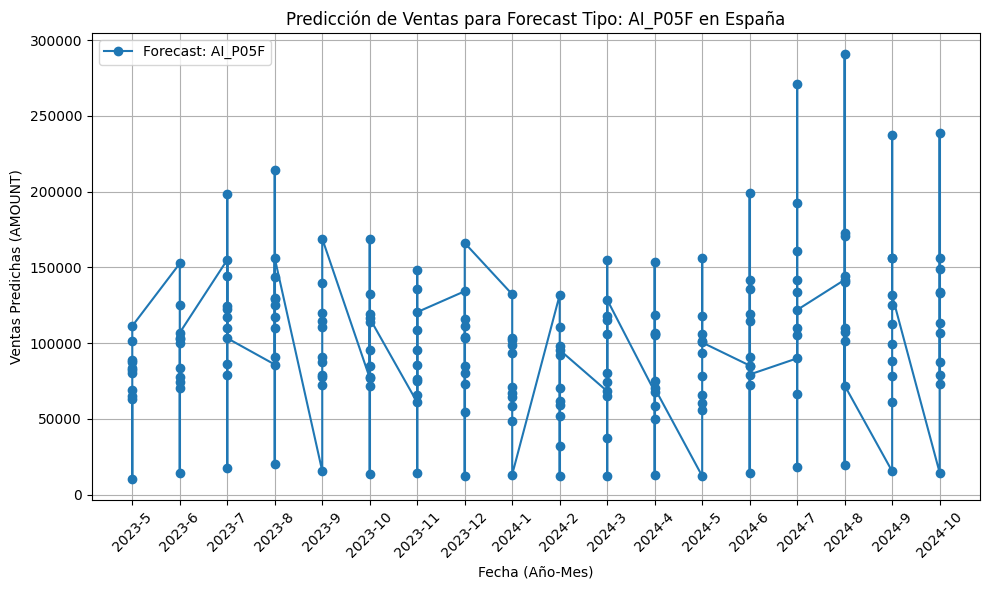

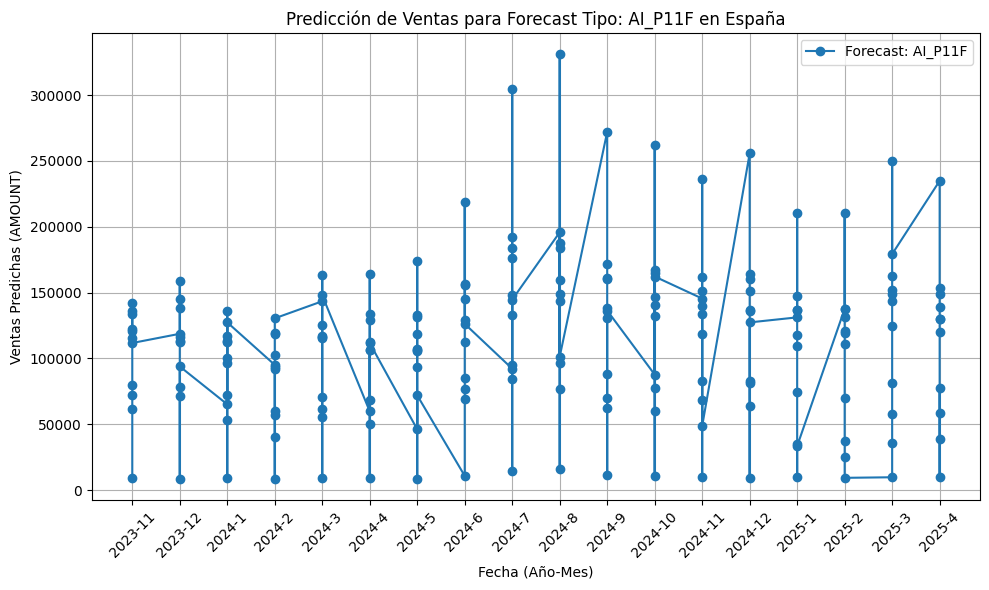

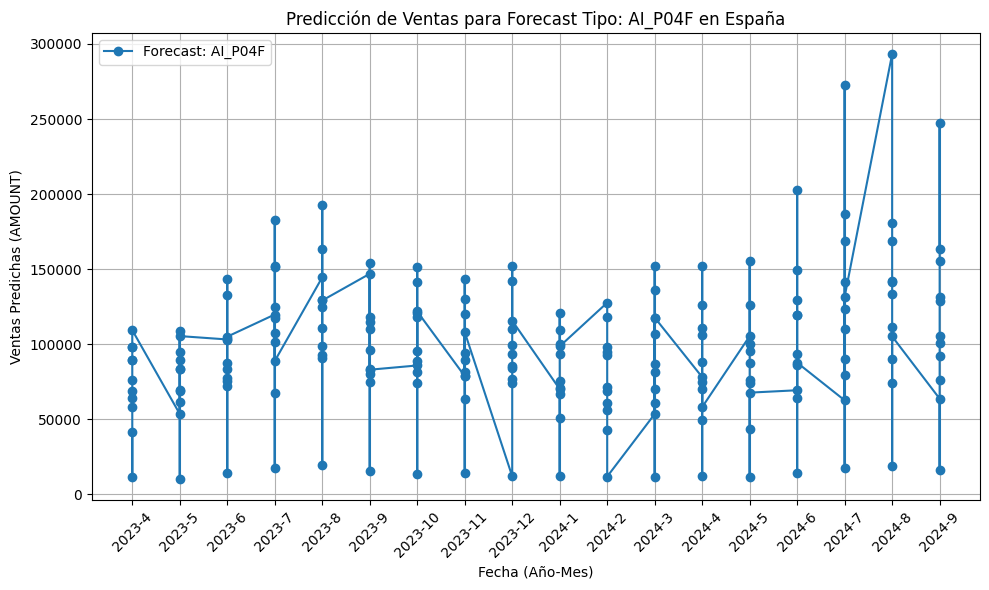

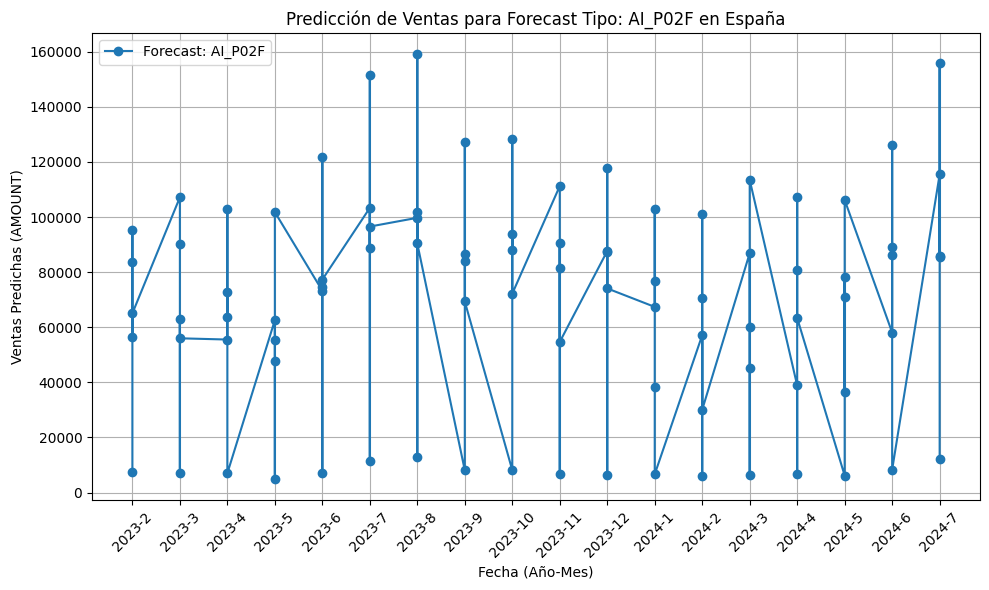

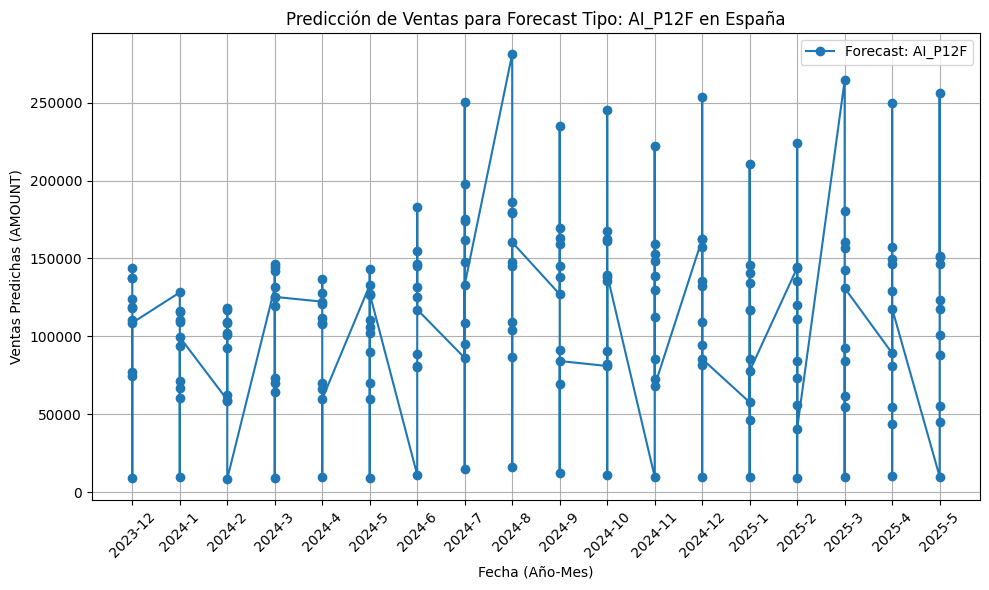

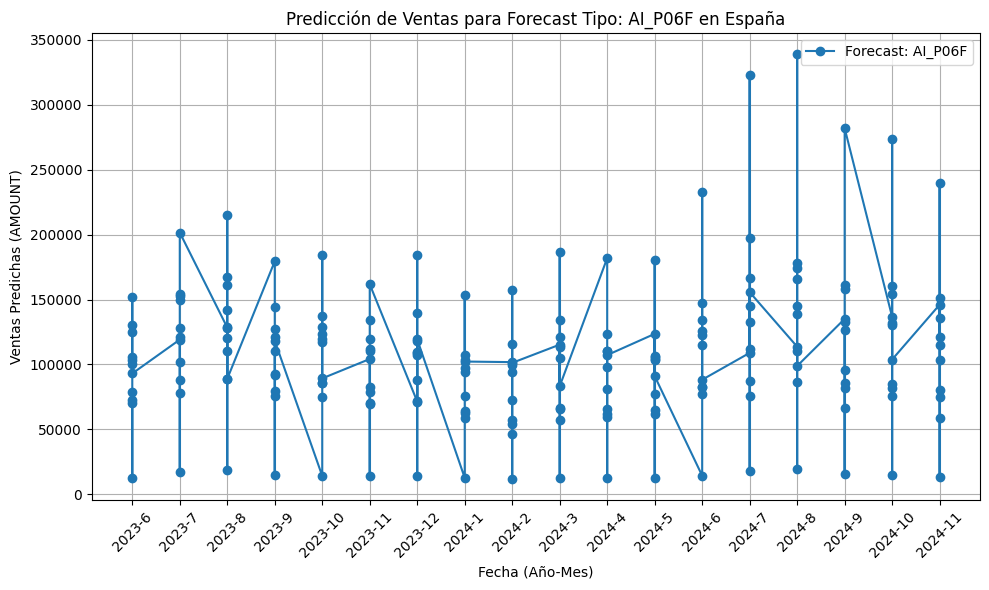

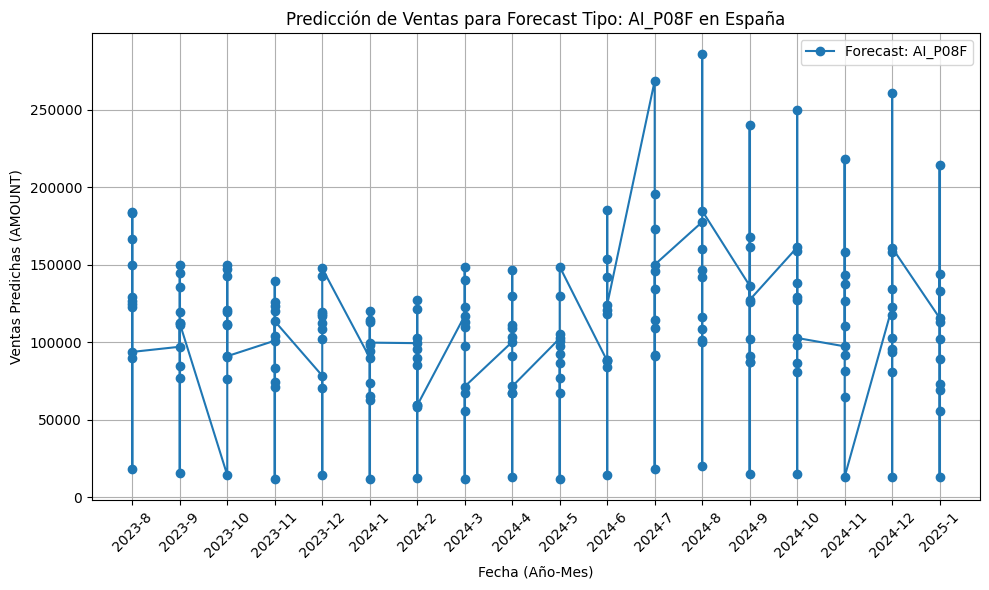

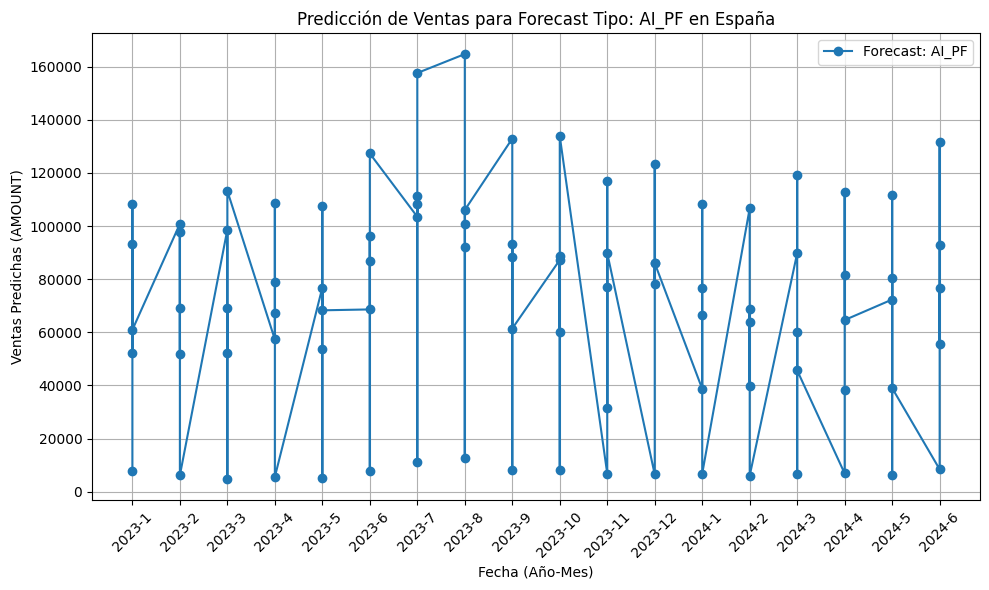

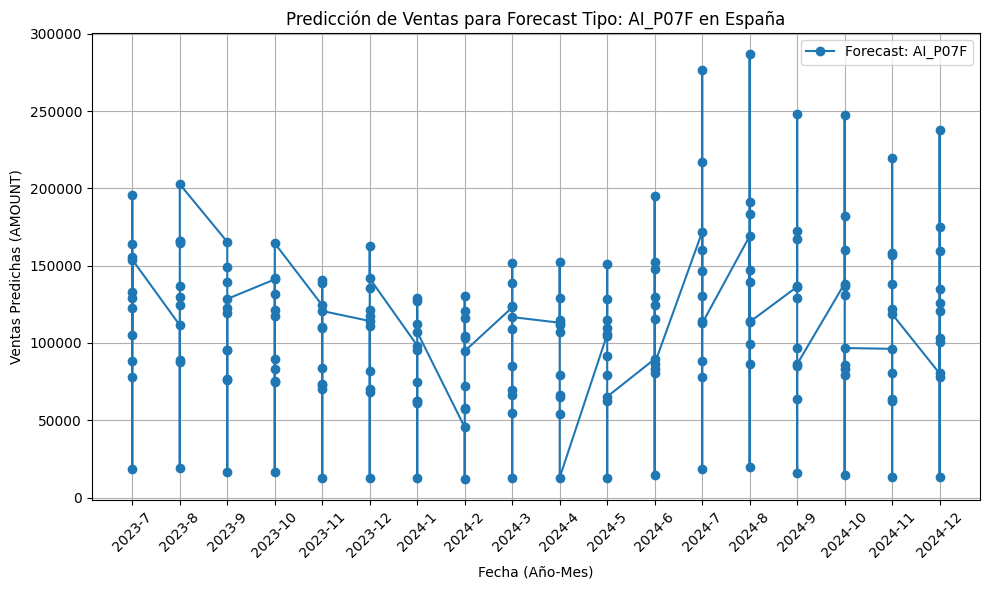

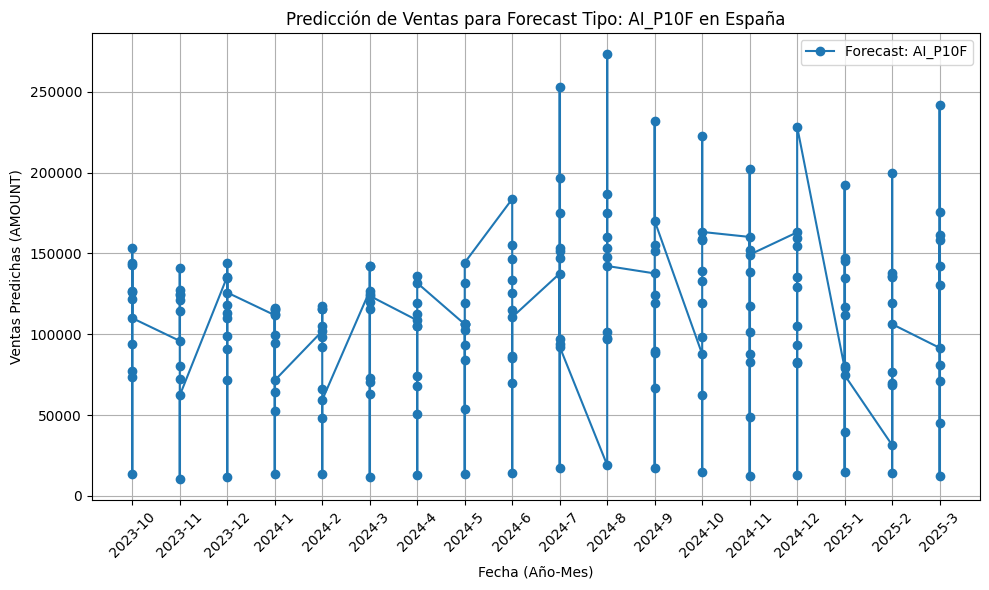

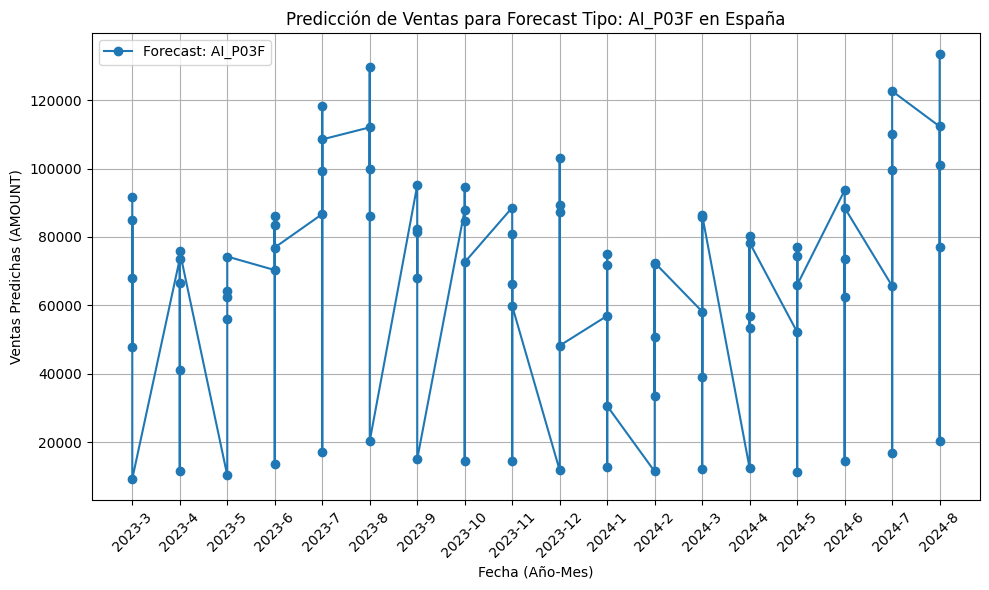

In [71]:
# Lista única de tipos de forecast
tipos_forecast = df_ventas_pred['FORECAST'].unique()

# Iterar sobre cada tipo de forecast y graficar por separado
for tipo in tipos_forecast:
    # Filtrar datos para el tipo de forecast actual
    prediccion_tipo = df_ventas_pred[df_ventas_pred['FORECAST'] == tipo]

    # Ordenar los datos por año y mes
    prediccion_tipo = prediccion_tipo.sort_values(by=['YEAR', 'MONTH'])

    # Crear el gráfico de líneas
    plt.figure(figsize=(10, 6))
    plt.plot(prediccion_tipo['YEAR'].astype(str) + "-" + prediccion_tipo['MONTH'].astype(str),
             prediccion_tipo['AMOUNT'], marker='o', label=f'Forecast: {tipo}')

    # Etiquetas y título
    plt.xlabel('Fecha (Año-Mes)')
    plt.ylabel('Ventas Predichas (AMOUNT)')
    plt.title(f'Predicción de Ventas para Forecast Tipo: {tipo} en España')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

Como se puede ver, los valores generados por la IA son muy distintos a los reales. No habría sido útil mantenerlos en el estudio de la base de datos ya que generarían bastante error, al menos en España. De todas formas se hará el cálculo del error para ver de que orden es.

Además, se verá si ese error lo genera una marca en concreto o es en todas.

In [65]:
# Agrupar las ventas reales y las predicciones por marca para obtener el total
ventas_totales_reales_marca = df_ventas.groupby(['SUBBRAND'])['AMOUNT'].sum().reset_index()
ventas_totales_reales_marca['Tipo'] = 'Reales'

ventas_totales_prediccion_marca = df_ventas_pred.groupby(['SUBBRAND'])['AMOUNT'].sum().reset_index()
ventas_totales_prediccion_marca['Tipo'] = 'Predicción'

# Unir ambos DataFrames para la comparación por marca
df_comparacion_ventas_totales_marca = pd.concat([ventas_totales_reales_marca, ventas_totales_prediccion_marca])

# Crear gráfica comparativa de barras por marca
fig_comparacion_ventas_totales_marca = px.bar(df_comparacion_ventas_totales_marca,
                                              x='SUBBRAND',
                                              y='AMOUNT',
                                              color='Tipo',
                                              barmode='group',  # Mostrar las barras juntas para comparar
                                              labels={'AMOUNT': 'Ventas Totales', 'SUBBRAND': 'Marca'},
                                              title='Comparación de Ventas Totales Reales y Predicciones en España por Marca')

# Mostrar gráfica
fig_comparacion_ventas_totales_marca.show()

Como se puede ver el error es en todas. Es mayor en marcas como Pepsi Max y Pepsi Regular. Pero, estas son las más vendidas en general, por lo que tiene sentido que la IA haya generado valores mayores para estas dos bebidas.

Por último se calculará el error, aunque ya se sabe que las predicciones en España no son buenas.

In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

ventas_totales_reales_marca = df_ventas.groupby(['YEAR', 'MONTH', 'SUBBRAND'])['AMOUNT'].sum().reset_index()
ventas_totales_prediccion_marca = df_ventas_pred.groupby(['YEAR', 'MONTH', 'SUBBRAND'])['AMOUNT'].sum().reset_index()

# Unir las ventas reales y predicciones en un mismo DataFrame por 'YEAR', 'MONTH', y 'SUBBRAND'
df_comparacion = pd.merge(ventas_totales_reales_marca, ventas_totales_prediccion_marca,
                          on=['YEAR', 'MONTH', 'SUBBRAND'], suffixes=('_real', '_pred'))

# Calcular el MAE, MSE, y MAPE
mae = mean_absolute_error(df_comparacion['AMOUNT_real'], df_comparacion['AMOUNT_pred'])
mse = mean_squared_error(df_comparacion['AMOUNT_real'], df_comparacion['AMOUNT_pred'])
mape = (abs((df_comparacion['AMOUNT_real'] - df_comparacion['AMOUNT_pred']) / df_comparacion['AMOUNT_real']).mean()) * 100

print(f"Error Absoluto Medio (MAE): {mae}")
print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Error Porcentual Absoluto Medio (MAPE): {mape}%")

Error Absoluto Medio (MAE): 1442979.1097501263
Error Cuadrático Medio (MSE): 4620496607426.405
Error Porcentual Absoluto Medio (MAPE): 1505.4305720196812%


Los errores son:
MAE: el error medio en las unidades de venta.
MSE: identifica si hay errores grandes (al estar elevado al cuadrado).
MAPE: qué porcentaje de error tiene en promedio.

Luego, con el MAE se puede ver que, en promedio, las predicciones están desviándose por más de 1.4 millones de unidades de las ventas reales. Esto es una desviación bastante alta, normalmente los errores mucho más bajos.

Con el MSE tan grande se puede comprobar que los errores grandes son muchos, ya que este penaliza más las desviaciones más altas.

Por último, el MAPE indica que las predicciones se desvían en más de 15 veces el valor real. Este es un indicador claro de que las predicciones no están siendo precisas.
